In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ryandpark/fruit-quality-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\garib\.cache\kagglehub\datasets\ryandpark\fruit-quality-classification\versions\1


In [2]:
import os
from pathlib import Path
import shutil
import time

# clean dir
#shutil.rmtree('/kaggle/working')

# create folder for datasets if doesnt exists
if not os.path.exists("./dataset/banana/good"):
    os.makedirs("./dataset/banana/good")
if not os.path.exists("./dataset/banana/bad"):
    os.makedirs("./dataset/banana/bad")

# move relevant dataset to a folder
move_paths = [
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Good Quality_Fruits/Banana_Good', './dataset/banana/good'],
    ['C:/Users/garib/.cache/kagglehub/datasets/ryandpark/fruit-quality-classification/versions/1/Bad Quality_Fruits/Banana_Bad', './dataset/banana/bad'],
    #['/kaggle/input/fruit-quality-classification/Good Quality_Fruits/Banana_Good/', '/kaggle/working/banana/good'],
    #['/kaggle/input/fruit-quality-classification/Bad Quality_Fruits/Banana_Bad/', '/kaggle/working/banana/bad']
] 

for move_path in move_paths:
    src_path = move_path[0]
    trg_path = move_path[1]
    for src_file in Path(src_path).glob('*.*'):
        shutil.copy(src_file, trg_path)

In [ ]:
# dataset count
good_bananas = next(os.walk('./dataset/banana/good'))[2]
print('Good Bananas: ', len(good_bananas))

bad_bananas = next(os.walk('./dataset/banana/bad'))[2]
print('Bad Bananas: ', len(bad_bananas))

Good Bananas:  1113
Bad Bananas:  1087


Criação da CNN

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [4]:
# Split training and testing datasets

import random

def split_files(src_dir, train_file_count, test_dir, train_dir):
    # Get a list of all files in the source directory
    files = os.listdir(src_dir)

    # Shuffle the list of files
    random.shuffle(files)

    # Move the first `train_file_count` files to the train directory
    for i in range(train_file_count):
        file = files[i]
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(train_dir, file)
        os.rename(src_path, dst_path)

    # Move the remaining files to the test directory
    for file in files[train_file_count:]:
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(test_dir, file)
        os.rename(src_path, dst_path)

In [ ]:
if not os.path.exists("./dataset/test/good"):
    os.makedirs("./dataset/test/good")
if not os.path.exists("./dataset/train/good"):
    os.makedirs("./dataset/train/good")
if not os.path.exists("./dataset/test/bad"):
    os.makedirs("./dataset/test/bad")
if not os.path.exists("./dataset/train/bad"):
    os.makedirs("./dataset/train/bad")

# Set the source directory and the destination directories
src_dir_good = './dataset/banana/good'
test_dir_good = './dataset/test/good'
train_dir_good = './dataset/train/good'

src_dir_bad = './dataset/banana/bad'
test_dir_bad = './dataset/test/bad'
train_dir_bad = './dataset/train/bad'

split_files(src_dir_good, 800, test_dir_good, train_dir_good)
split_files(src_dir_bad, 800, test_dir_bad, train_dir_bad)

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: './dataset/banana/good\\IMG_8545.JPG' -> './dataset/train/good\\IMG_8545.JPG'

In [5]:
labels = ['good', 'bad']

In [46]:
# prepare dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1,
                              rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) 


train_path = './dataset/train'
test_path = './dataset/test'

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=(240,240), 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=(240,240), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1546 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [47]:
def print_files(dir_path):
    # Get a list of all files in the directory
    files = os.listdir(dir_path)

    print(f'Found {len(files)} files')
    
    # Print the files
    for file in files:
        print(file)

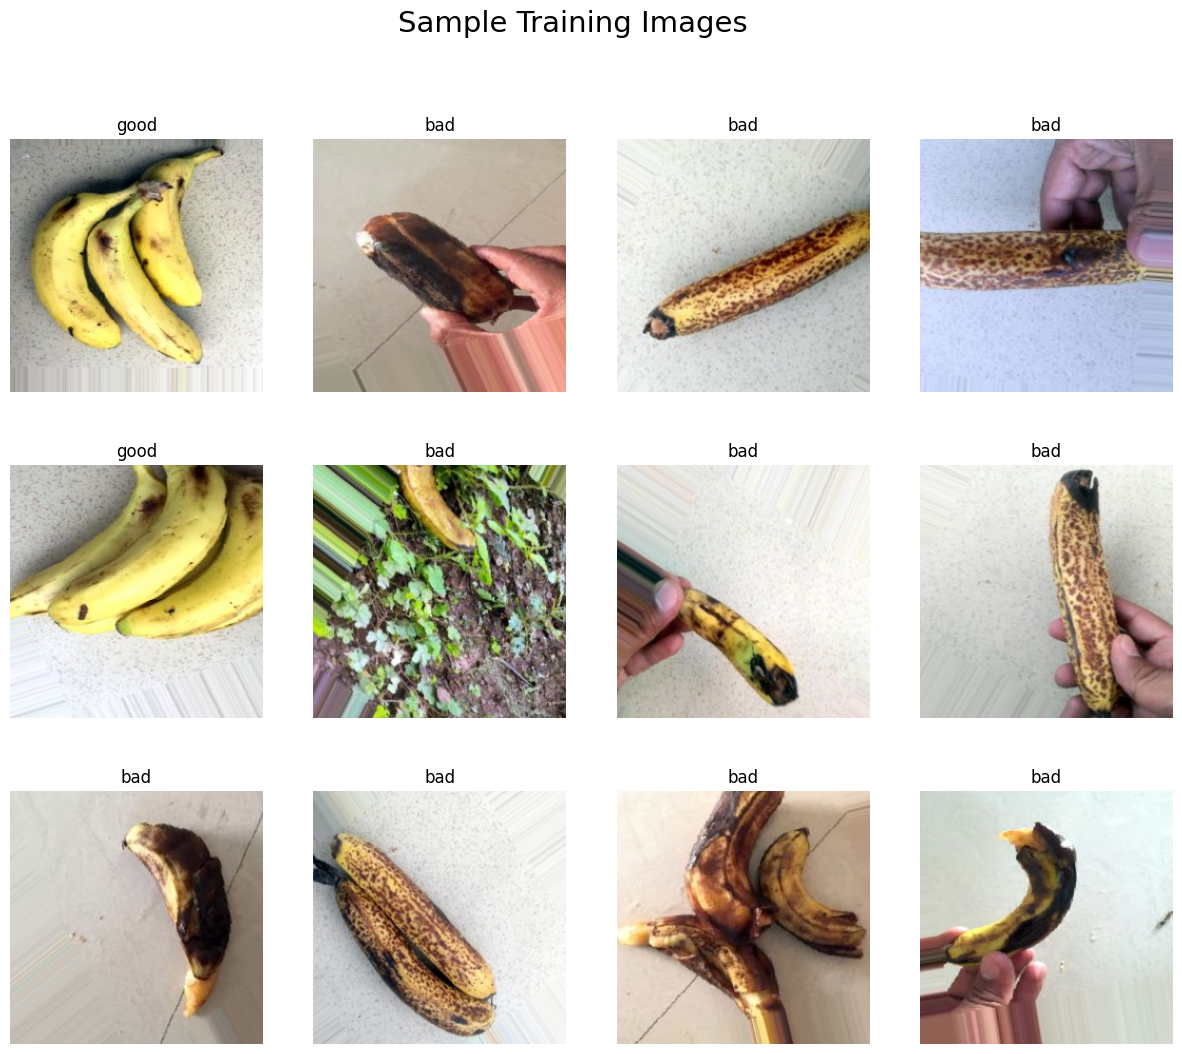

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
# # Create model

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
# model.add(tf.keras.layers.MaxPool2D((2,2)))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D((2,2)))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D((2,2)))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))

# model.add(tf.keras.layers.Dense(2, activation='softmax'))
# model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

c:\Users\garib\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Modelo base segundo teste
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(240,240,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
preds = Dense(2, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=preds)

# Congelar base
for layer in base_model.layers:
    layer.trainable = False

# Compilar e treinar
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


C:\Users\garib\AppData\Local\Temp\ipykernel_7752\2023984028.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(240,240,3))


In [49]:
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))

Epoch 1/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 466ms/step - accuracy: 0.9340 - loss: 0.1973 - val_accuracy: 0.8246 - val_loss: 0.4171
Epoch 2/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.9909 - loss: 0.0384 - val_accuracy: 0.8304 - val_loss: 0.4168
Epoch 3/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 395ms/step - accuracy: 0.9948 - loss: 0.0250 - val_accuracy: 0.8772 - val_loss: 0.3782
Epoch 4/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.9968 - loss: 0.0200 - val_accuracy: 0.8772 - val_loss: 0.3272
Epoch 5/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9961 - loss: 0.0168 - val_accuracy: 0.8596 - val_loss: 0.3896
Epoch 6/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9994 - loss: 0.0106 - val_accuracy: 0.8713 - val_loss: 0.4312
Epoch 7/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 863ms/step - accuracy: 0.9981 - loss: 0.0104 - val_accuracy: 0.8830 - val_loss: 0.4243
Epoch 8/12
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9961 - loss: 0.0110 - val_accuracy: 0.9

In [50]:
model.save("meu_modelo.h5")

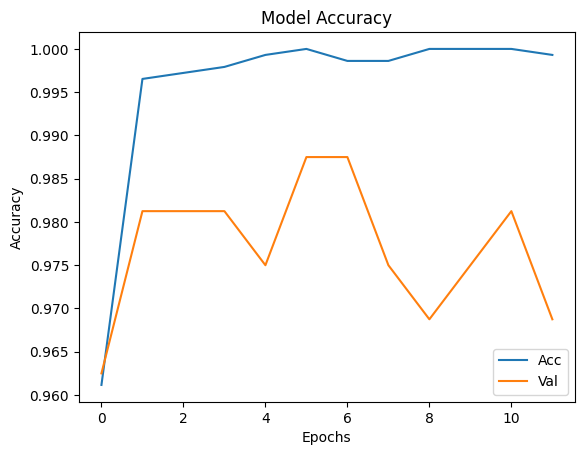

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

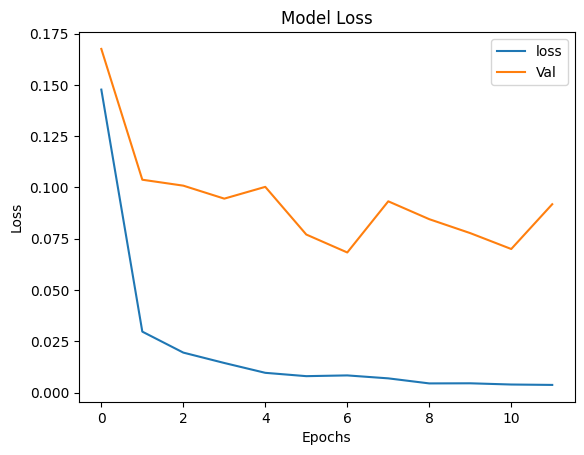

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  batch_size=1,
                                                  target_size=(240,240),
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 600 images belonging to 2 classes.
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9950 - loss: 0.0161
accuracy test:  0.9950000047683716
loss test:  0.016146305948495865
